In [2]:
import tradingeconomics as te
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
te.login(); # Signup for a free API key at https://developer.tradingeconomics.com/

##Analyse data on tertiary educational attainment and overall digital skills

In [ ]:
#Get data on tertiary educational attainment
tert_educ = te.getEurostatData(category = 'Tertiary educational attainment', output_type = 'df')
#Get data on digital skills
digit_skills = te.getEurostatData(category = 'Individuals who have basic or above basic overall digital skills: All Individuals', output_type = 'df')
#Merge the two dataframes
data = tert_educ.merge(digit_skills, on='Country')
data = data[['Country', 'LatestValue_x', 'LatestValue_y']].rename(columns = {'LatestValue_y':'Basic or above basic overall digital skills %', 'LatestValue_x':'Tertiary education %'})

In [5]:
data

,Country,Tertiary education %,Basic or above basic overall digital skills %
0,Euro Area,41.4,59.0
1,Sweden,52.2,72.0
2,Finland,49.6,76.0
3,Slovakia,39.7,54.0
4,Slovenia,46.9,55.0
5,Romania,26.4,31.0
6,Portugal,39.6,52.0
7,Poland,47.0,44.0
8,Austria,41.6,66.0
9,Netherlands,54.0,79.0


##Plot

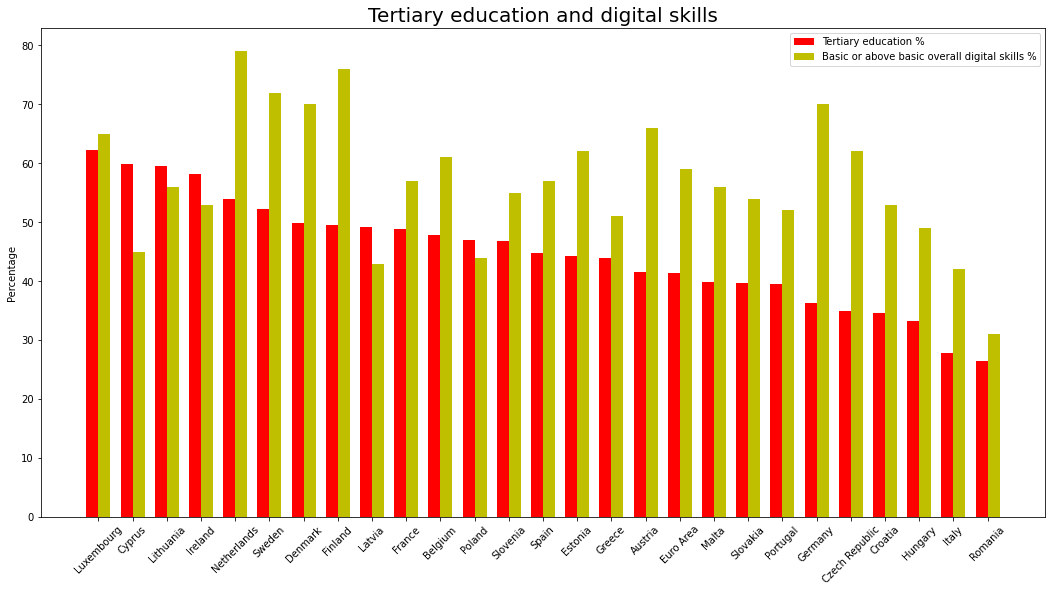

In [6]:
#Sort by tertiary educational attainment
data.sort_values(['Tertiary education %'], ascending=False, inplace=True)
N = len(data)
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars
fig, ax = plt.subplots(figsize=(18, 9))
plt.setp(ax.get_xticklabels(),rotation=45)
rects1 = ax.bar(ind, data['Tertiary education %'].values.tolist(), width, color='r')
rects2 = ax.bar(ind + width, data['Basic or above basic overall digital skills %'].values.tolist(), width, color='y')
ax.set_ylabel('Percentage')
ax.set_title('Tertiary education and digital skills', size=20)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(data['Country'].values.tolist())
ax.legend((rects1[0], rects2[0]), ('Tertiary education %', 'Basic or above basic overall digital skills %'))
plt.show()

###As can be seen above, tertiary educational attainment cannot be considered a good predictor of overall digital skills.